<a href="https://colab.research.google.com/github/GWANGHYUNYU/pytorch-tutorial/blob/master/02_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

주어진 데이터에 대하여 예측을 하는 머신러닝 방법

주어지는 데이터를 공부한 시간 대비 맞은 점수라고 가정해보자.

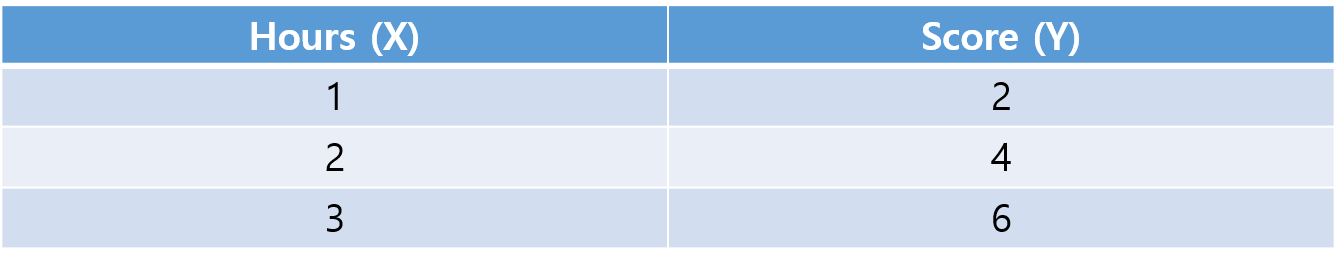

**Linear Regression에 핵심 이론**


> **Hypothesis**

*   주어진 `x` 값에 대해 예측을 어떻게 할 것인가?





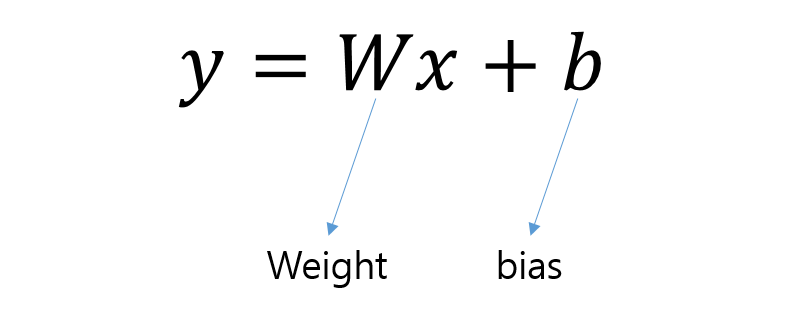



> **Cost Function**

*   Hypotehsis(Prediction)가 y(Target)을 얼마나 잘 예측했는가?
*   Mean Square Error

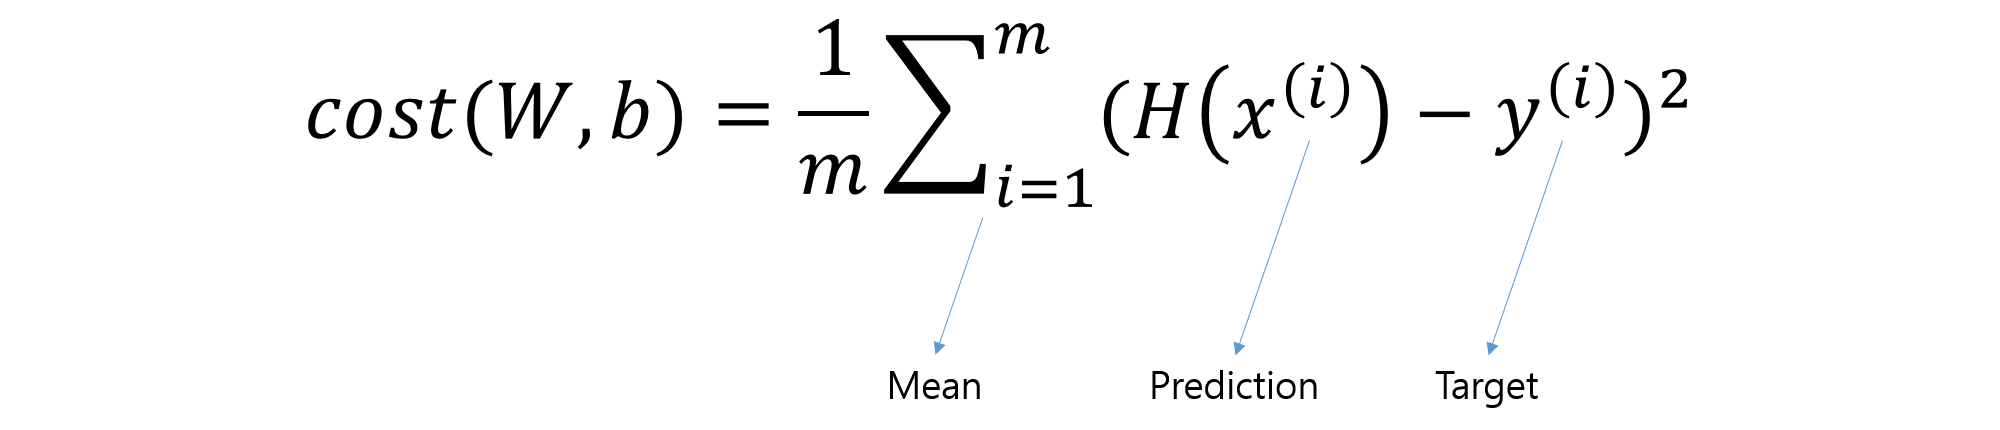



**Imports**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

**Data**

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])  # 공부한 시간
y_train = torch.FloatTensor([[2], [4], [6]])  # 공부한 시간 대비 획득한 점수

In [ ]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [ ]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


**Weight Initialization**

In [ ]:
W = torch.zeros(1, requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [ ]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


**Hypothesis**

In [ ]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


**Cost**

In [ ]:
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [ ]:
print(y_train)

tensor([[2.],
        [4.],
        [6.]])


In [ ]:
print(hypothesis - y_train)

tensor([[-2.],
        [-4.],
        [-6.]], grad_fn=<SubBackward0>)


In [ ]:
print((hypothesis - y_train) ** 2)

tensor([[ 4.],
        [16.],
        [36.]], grad_fn=<PowBackward0>)


In [ ]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


**Gradient Descent**

In [ ]:
optimizer = optim.SGD([W, b], lr=0.01)

In [ ]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

In [ ]:
print(W)
print(b)

tensor([0.1867], requires_grad=True)
tensor([0.0800], requires_grad=True)


In [ ]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.2667],
        [0.4533],
        [0.6400]], grad_fn=<AddBackward0>)


In [ ]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(14.7710, grad_fn=<MeanBackward0>)


**Training with Full Code**

In [ ]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

print('training done')
print('Hypothesis result is {}'.format(x_train * W + b))

Epoch    0/1000 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1000 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1000 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1000 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1000 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1000 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1000 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1000 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1000 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1000 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1000 W: 1.971, b: 0.066 Cost: 0.000633
training done
Hypothesis result is tensor([[2.0371],
        [4.0080],
        [5.9788]], grad_fn=<AddBackward0>)


**Training with nn.Module**

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

Linear Regression Model을 Pytorch에서 제공하는 `nn.Module`을 inherit해서 만듭니다.

모델의 `__init__` 에서는 사용할 레이어들을 정의하게 됩니다. 여기에서는 Linear Regression Model을 만들기 때문에 nn.Linear을 사용합니다.

`forward` 에서는 모델이 어떻게 입력값에서 출력값을 계산하는지 정의합니다.

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

`nn.Module`을 상속 받아 만든 사용자 정의 모드의 LinearRegressionModel Class를 객체화시킵니다.

In [ ]:
model = LinearRegressionModel()

In [ ]:
hypothesis = model(x_train)

In [ ]:
print(hypothesis)

tensor([[ 0.2821],
        [-0.2001],
        [-0.6824]], grad_fn=<AddmmBackward>)


Cost함수 구현을 위해서, Pytorch의 `nn.Functional`에서 기본적으로 제공하는 Mean Square Error(MSE)를 사용합니다.

In [ ]:
cost = F.mse_loss(hypothesis, y_train)
print(cost)

tensor(21.7489, grad_fn=<MseLossBackward>)


Pytorch의 torch.optim 에서 기본적으로 제공하는 optimizer를 사용합니다.

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

**Training with Full Code**

In [ ]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 초기화
model = LinearRegressionModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

print('training done')
print('Hypothesis result is {}'.format(x_train * W + b))

Epoch    0/1000 W: 1.971, b: 0.066 Cost: 7.100228
Epoch  100/1000 W: 1.971, b: 0.066 Cost: 0.059122
Epoch  200/1000 W: 1.971, b: 0.066 Cost: 0.036534
Epoch  300/1000 W: 1.971, b: 0.066 Cost: 0.022576
Epoch  400/1000 W: 1.971, b: 0.066 Cost: 0.013950
Epoch  500/1000 W: 1.971, b: 0.066 Cost: 0.008620
Epoch  600/1000 W: 1.971, b: 0.066 Cost: 0.005327
Epoch  700/1000 W: 1.971, b: 0.066 Cost: 0.003292
Epoch  800/1000 W: 1.971, b: 0.066 Cost: 0.002034
Epoch  900/1000 W: 1.971, b: 0.066 Cost: 0.001257
Epoch 1000/1000 W: 1.971, b: 0.066 Cost: 0.000777
training done
Hypothesis result is tensor([[2.0371],
        [4.0080],
        [5.9788]], grad_fn=<AddBackward0>)
